In [57]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def euclid_distance(x1, x2) :
    return (((x1-x2)**2).sum())**0.5


def take_first(elem) :
    return elem[0]

    
def fit_for_one(X_train, Y_train, X, k) :
    distance = [[euclid_distance(X_train[i], X), i] for i in range(len(X_train))]    
    distance.sort(key = take_first)
    
    count0, count1 = 0, 0
    
    for i in range(k) :
        if Y_train[distance[i][1]] == 0:
            count0 += 1
        else :
            count1 += 1
            
    if count0 > count1 :
        return 0
    
    return 1



def fit(X_train, Y_train, X_test, k) :
    Y_pred = [fit_for_one(X_train, Y_train, X_test[i], k) for i in range(len(X_test))]    
    return Y_pred


def score(Y_test, Y_pred) :
    count = 0
    
    for i in range(len(Y_test)) :
        if Y_test[i] == Y_pred[i] :
            count += 1
            
    return count/len(Y_pred)

In [55]:
cancer = datasets.load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2)

Y_pred = fit(X_train, Y_train, X_test, 10)
print(Y_pred-Y_test)
print(score(Y_pred, Y_test))

[ 0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0]
0.9473684210526315


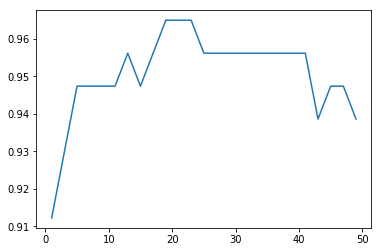

In [58]:
x = []
y = []

for k in range(1, 50, 2) :
    x = x + [k]
    y = y + [score(Y_test, fit(X_train, Y_train, X_test, k))]

plt.plot(x, y)
plt.show()